# Projet - Real or Not? NLP with Disaster Tweets

## Project description 

* Competition - https://www.kaggle.com/c/nlp-getting-started

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import re

In [115]:
train = pd.read_csv('/content/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [116]:
test = pd.read_csv('/content/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [117]:
train.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [118]:
train.shape

(7613, 5)

In [119]:
train.isna().sum()/train.shape[0]

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

In [120]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [121]:
train.keyword.value_counts().head(10)

fatalities     45
deluge         42
armageddon     42
sinking        41
body%20bags    41
harm           41
damage         41
outbreak       40
windstorm      40
evacuate       40
Name: keyword, dtype: int64

In [122]:
train.location.value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

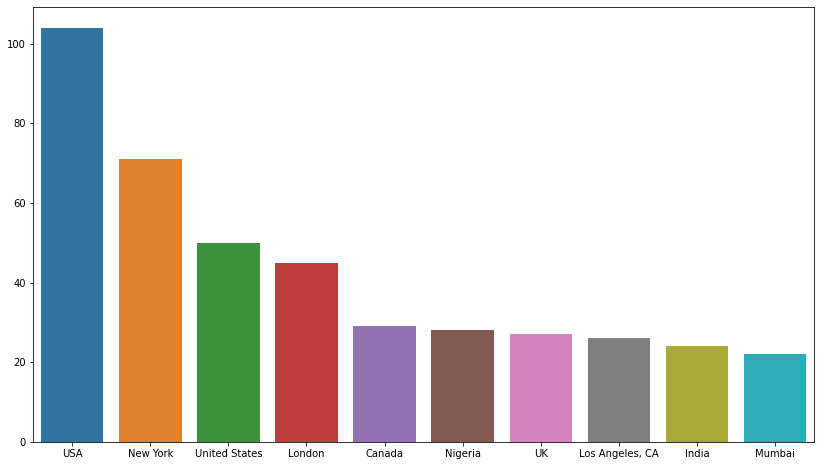

In [123]:
plt.figure(figsize=(14,8))
sns.barplot(data=train, x=train.location.value_counts().head(10).index, y=train.location.value_counts().head(10).values)
plt.show()

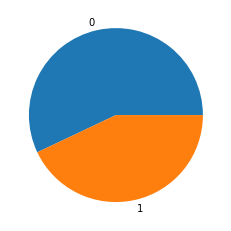

In [124]:
plt.pie(train.target.value_counts().values, labels=train.target.value_counts().index, )
plt.show()
#sns.catplot(train.target)

In [125]:
train['len']=train.text.str.split().apply(lambda x: len(x))

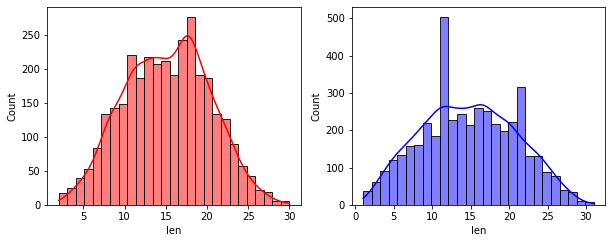

In [126]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(train[train.target==1].len, bins=27, kde=True, color='r')
plt.subplot(2,2,2)
sns.histplot(train[train.target==0].len, bins=27, kde=True, color='b')
plt.show()

In [127]:
train[train.target==1].len.mean()

15.167532864567411

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [129]:
!python -m spacy download en_core_web_sm -q


     |████████████████████████████████| 12.0 MB 18.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [130]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [131]:
from spacy.lang.en.stop_words import STOP_WORDS

In [132]:
train.head()

,id,keyword,location,text,target,len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


In [133]:
train_df = train[['text', 'target']]
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [134]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [135]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [136]:
train_df["text"] = train_df["text"].apply(lambda x: remove_URL(x))
train_df["text"] = train_df["text"].apply(lambda x: remove_emoji(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
train_df.text[31]

'@bbcmtd Wholesale Markets ablaze '

In [143]:
# Remove all non alphanumeric characters except whitespaces
train_df["text_clean"] = train_df["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [144]:
train_df.head(10)

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school
5,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 close dir...
6,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain cause flash flooding...
7,I'm on top of the hill and I can see a fire in...,1,hill fire wood
8,There's an emergency evacuation happening now ...,1,s emergency evacuation happen building street
9,I'm afraid that the tornado is coming to our a...,1,afraid tornado come area


In [145]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

In [146]:
tokenizer.fit_on_texts(train_df.text_clean)

In [147]:
train_df["text_encoded"] = tokenizer.texts_to_sequences(train_df.text_clean)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
train_df["len_text"] = train_df["text_encoded"].apply(lambda x: len(x))
train_df = train_df[train_df["len_text"]!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
train_pad = tf.keras.preprocessing.sequence.pad_sequences(train_df.text_encoded, padding="post")


In [151]:
full_ds = tf.data.Dataset.from_tensor_slices((train_pad, train_df.target))


In [219]:
TAKE_SIZE = int(0.8*train_df.shape[0])

train_data = full_ds.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(32)

test_data = full_ds.skip(TAKE_SIZE)
test_data = test_data.batch(32)

In [220]:
for tweet, target in train_data.take(1):
  print(tweet, target)

tf.Tensor(
[[3790 3791  646 2540  115 1710  275  240 7560  282    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [ 514 4322 2998 3208  217 7965 1158  153   37   12 4323    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [4110  277  254 1564  491  487 1216   24 2210 1753 2774 3742  151    0
     0    0    0    0    0    0    0    0    0    0    0]
 [5526   23  213 3666   25  132  443    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [  45  321 1123 2176 1605    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [ 592   21  928 3458  126 4867    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [  55   80  566 9736 3036  621   52 9737    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [1115   55 2948  367  432  170  529 1562 2949  728 3889    0    0    0
     0 

In [223]:
tokenizer.word_counts

OrderedDict([('deed', 2),
             ('reason', 30),
             ('earthquake', 53),
             ('allah', 8),
             ('forgive', 5),
             ('forest', 66),
             ('fire', 355),
             ('near', 56),
             ('la', 25),
             ('ronge', 1),
             ('sask', 1),
             ('canada', 13),
             ('resident', 8),
             ('ask', 28),
             ('shelter', 6),
             ('place', 35),
             ('notify', 1),
             ('officer', 37),
             ('evacuation', 51),
             ('order', 37),
             ('expect', 32),
             ('13000', 4),
             ('people', 199),
             ('receive', 4),
             ('wildfire', 83),
             ('california', 117),
             ('send', 52),
             ('photo', 65),
             ('ruby', 1),
             ('alaska', 6),
             ('smoke', 53),
             ('pour', 4),
             ('school', 69),
             ('rockyfire', 4),
             ('update', 53),
 

In [221]:
embedding_dim=16 # the dimensionality of the representation space

vocab_size = tokenizer.num_words # the number of words in the vocabulary
model = Sequential([
  Embedding(vocab_size, embedding_dim, name="embedding"), # the embedding layer
  # the input dim needs to be equal to the size of the vocabulary + 1 (because of
  # the zero padding)
  GlobalAveragePooling1D(), # this will pick the average for every word in the sentence
  # along each dimension of the representation space.
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer

])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [187]:
model.fit(
    train_data,
    validation_data=test_data,
    epochs=15)

Epoch 1/15
84/84 [==============================] - 2s 7ms/step - loss: 0.6791 - accuracy: 0.5667 - val_loss: 0.6743 - val_accuracy: 0.5577
Epoch 2/15
84/84 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.6102 - val_loss: 0.6313 - val_accuracy: 0.6550
Epoch 3/15
84/84 [==============================] - 0s 5ms/step - loss: 0.5255 - accuracy: 0.7908 - val_loss: 0.5572 - val_accuracy: 0.7212
Epoch 4/15
84/84 [==============================] - 0s 5ms/step - loss: 0.3986 - accuracy: 0.8553 - val_loss: 0.5060 - val_accuracy: 0.7646
Epoch 5/15
84/84 [==============================] - 0s 5ms/step - loss: 0.3184 - accuracy: 0.8857 - val_loss: 0.4955 - val_accuracy: 0.7685
Epoch 6/15
84/84 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.9028 - val_loss: 0.4946 - val_accuracy: 0.7764
Epoch 7/15
84/84 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 0.9186 - val_loss: 0.5037 - val_accuracy: 0.7760
Epoch 8/15
84/84 [==

In [204]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

vocab_size = len(tokenizer.word_index)
model_gru = tf.keras.Sequential([
                  Embedding(vocab_size, 64, input_shape=[tweet.shape[1],],name="embedding", mask_zero=True),
                  GRU(units=64, return_sequences=False), # maintains the sequential nature
                  #GRU(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  #Dense(8, activation='relu'),
                  Dense(1, activation="sigmoid")
])

In [205]:
model_gru.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 64)            1019136   
                                                                 
 gru_11 (GRU)                (None, 64)                24960     
                                                                 
 dense_28 (Dense)            (None, 16)                1040      
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,045,153
Trainable params: 1,045,153
Non-trainable params: 0
_________________________________________________________________


In [208]:
model_gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [209]:
model_gru.fit(train_data,
              epochs=20, 
              validation_data=test_data)

Epoch 1/20
84/84 [==============================] - 13s 91ms/step - loss: 0.0394 - accuracy: 0.9803 - val_loss: 1.5154 - val_accuracy: 0.7058
Epoch 2/20
84/84 [==============================] - 5s 63ms/step - loss: 0.0347 - accuracy: 0.9820 - val_loss: 1.5659 - val_accuracy: 0.7107
Epoch 3/20
84/84 [==============================] - 4s 47ms/step - loss: 0.0330 - accuracy: 0.9823 - val_loss: 1.6579 - val_accuracy: 0.7085
Epoch 4/20
84/84 [==============================] - 3s 35ms/step - loss: 0.0320 - accuracy: 0.9827 - val_loss: 1.7858 - val_accuracy: 0.7089
Epoch 5/20
84/84 [==============================] - 3s 35ms/step - loss: 0.0317 - accuracy: 0.9827 - val_loss: 1.8642 - val_accuracy: 0.7102
Epoch 6/20
84/84 [==============================] - 3s 35ms/step - loss: 0.0307 - accuracy: 0.9825 - val_loss: 1.9404 - val_accuracy: 0.7089
Epoch 7/20
84/84 [==============================] - 3s 35ms/step - loss: 0.0302 - accuracy: 0.9827 - val_loss: 2.0516 - val_accuracy: 0.7067
Epoch 8/20
8

In [216]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

vocab_size = len(tokenizer.word_index)
model_lstm = tf.keras.Sequential([
                  Embedding(vocab_size, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  LSTM(units=64, return_sequences=True), # maintains the sequential nature
                  LSTM(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid", name="last")
])

In [217]:
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [218]:
model_lstm.fit(train_data,
              epochs=20, 
              validation_data=test_data)

Epoch 1/20
84/84 [==============================] - 8s 55ms/step - loss: 0.6564 - accuracy: 0.6023 - val_loss: 0.5905 - val_accuracy: 0.7172
Epoch 2/20
84/84 [==============================] - 4s 45ms/step - loss: 0.3962 - accuracy: 0.8374 - val_loss: 0.5138 - val_accuracy: 0.7536
Epoch 3/20
84/84 [==============================] - 4s 45ms/step - loss: 0.2564 - accuracy: 0.9064 - val_loss: 0.5784 - val_accuracy: 0.7422
Epoch 4/20
84/84 [==============================] - 4s 45ms/step - loss: 0.1765 - accuracy: 0.9408 - val_loss: 0.7192 - val_accuracy: 0.7264
Epoch 5/20
84/84 [==============================] - 4s 46ms/step - loss: 0.1352 - accuracy: 0.9583 - val_loss: 0.7761 - val_accuracy: 0.6966
Epoch 6/20
84/84 [==============================] - 4s 45ms/step - loss: 0.1131 - accuracy: 0.9660 - val_loss: 0.8871 - val_accuracy: 0.7155
Epoch 7/20
84/84 [==============================] - 4s 45ms/step - loss: 0.0989 - accuracy: 0.9695 - val_loss: 0.8834 - val_accuracy: 0.7076
Epoch 8/20
84